In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import scipy.optimize as opt
from scipy.optimize import curve_fit
import spinmob as s
# import os 

In [3]:
def linear(V, m, b):
    return m*V + b

def linearErr(V, erV, m, erM, b, erb):
    return np.sqrt( (m*V)**2*( (erM/m)**2+ (erV/V)**2) + (erb)**2 )


In [4]:
CalData = np.transpose(np.loadtxt("Calibration_EQ6085.csv", delimiter=',', skiprows = 1))

# print(CalData[0])

In [26]:
#1G = 1e(-4)T
#1T = 10 000 G
# so 0.5 T is 5000G -> 5kG

# for i in range(0, int(len(final_result)/10)):
popt, pcov = curve_fit(linear, CalData[0][0:-9], CalData[1][0:-9])
errP = np.sqrt(np.diag(pcov))
mMag = popt[0]
bMag = popt[1]

In [27]:
V = np.linspace(0, .6, 100)

# plt.plot(CalData[0], CalData[1])
# plt.plot(V, linear(V, popt[0], popt[1]), ls="--")

# plt.title("T vs mV")
# plt.xlabel('V')
# plt.ylabel('kG')
# plt.show()

In [75]:
def getMagFromVolt_Err(V):
    
    ErrV = 0.012*V + 3**3*(1e-7)
    
    magField = linear(np.abs(V), mMag, bMag)
    
    Err = linearErr(np.abs(V), ErrV, mMag, errP[0], bMag, errP[1])
    
    if V < 0:
        magField = magField*(-1)
    
    return [magField, Err]


"""
Takes input voltage (mV) and outputs corresponding temperature (C)
Must be run with mVArraysOf10[] and fits[]
Need errors


"""
def getTempFromVolt(V):
    fitted = False
    index = 0

    while fitted == False:
    #     print(min(mVArraysOf10[index]), (max(mVArraysOf10[index])) )
        if (min(mVArraysOf10[index]) <= V <= (max(mVArraysOf10[index])) ):
            TempVal = linear(V, fits[index][0][0], fits[index][0][1])
            fitted = True

        index+=1
        if index == len(fits):
            print("Error, Voltage not found.")
            TempVal = 0
            break
    
    return TempVal

def linearErr(V, erV, m, erM, b, erb):
    return np.sqrt( (m*V)**2*( (erM/m)**2+ (erV/V)**2) + (erb)**2 )

"""
Takes in a voltage and it's error.
Returns an array of the corresponding temp in kelvin and it's error
"""
def getTempFromVolt_Err(V, ErrV):
    fitted = False
    index = 0

    while fitted == False:
    #     print(min(mVArraysOf10[index]), (max(mVArraysOf10[index])) )
        if (min(mVArraysOf10[index]) <= V <= (max(mVArraysOf10[index])) ):
            TempVal = linear(V, fits[index][0][0], fits[index][0][1]) + 273.15
            fitted = True
            
            Err = linearErr(V, ErrV, fits[index][0][0], fits[index][1][0], fits[index][0][1], fits[index][1][1])
            #need to get errors
#             fits[index][1][0], fits[index][1][1] + error on V

        index+=1
        if index == len(fits):
            print("Error, Voltage not found.")
            TempVal = 0
            Err = 0
            break
    
    return [TempVal, Err]

"""
Given the data in voltages [V], returns an array of the same size with the error on each voltage
"""
def ErrOnVoltage(data):
    errStatic = 3**3*(1e-7)
    Err = []

    for row in data:
        row_err = []
        for ele in row:
            row_err.append(0.012*ele + errStatic) 

        Err.append(row_err)
        
    return np.array(Err)

In [78]:
Voltage = 0.322
# Voltage = -0.358

magFied = getMagFromVolt_Err(Voltage)

print("%f(%.4f) kG, or %f T" %(magFied[0], magFied[1], magFied[0]/10))

4.511194(0.0639) kG, or 0.451119 T


In [87]:
Voltages_for_Fields = np.transpose(np.loadtxt("Feb14_1610_VaryMagField.csv", delimiter=',', skiprows = 1))[0]
# print(FieldArray)

BFeild = (np.array([getMagFromVolt_Err(v) for v in Voltages_for_Fields])/10).T #this

# print(BFeild[0])

In [88]:
nameA = np.linspace(1, 21, 21)

ave = [] 
std = []

#loop through each data file for a different B feild run
for i in nameA:
    name = 'Data/BFeild/Voltage Readings Data F%i.csv' %(i)

    Data1 = np.transpose(np.loadtxt(name, delimiter=',', skiprows = 1))
    Data1_err = ErrOnVoltage(Data1)
    
#     print(len(Data1[0]))

    #get and save the average and std for each voltage
    ave1 = np.average(Data1, axis=1)
    std1 = np.std(Data1, axis=1)
#     print(ave1)
    
    ave.append(ave1)
    std.append(std1)

# print(ave)

ave = np.transpose(ave)
std = np.transpose(std)

# print(ave)


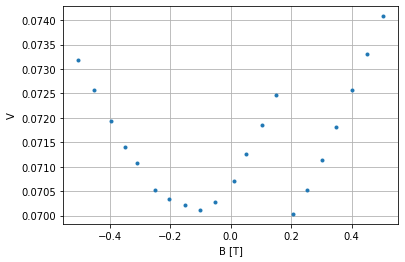

In [107]:
# print(ave1)

plt.plot(BFeild[0], ave[4], ls=" ", marker=".")

plt.grid()
plt.ylabel("V")
plt.xlabel("B [T]")

plt.show()